<a href="https://colab.research.google.com/github/arunsingh026/MachineLearning-/blob/main/Machin_LearningGL_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Preprocessing Techniques


### Missing value Treatments

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'Product': ['a', 'b', 'c', None, 'a', ' ', '-'],
    'Sales': [10, 40, None, 21, None, 3, 6]
})

# converting non-standard missing values to standard missing values
df['Product'] = df['Product'].replace({
    ' ': None,
    '-': None,
})
df.dtypes

,0
Product,object
Sales,float64


In [ ]:
df.isnull().sum() # no. of missing values in each column

,0
Product,3
Sales,2


In [ ]:
df.isnull().sum() / len(df) * 100 #percentage of missing values in each column

,0
Product,42.857143
Sales,28.571429


In [ ]:
sales = pd.read_csv('/content/bigmartsales-cleaned.csv')
sales.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/bigmartsales-cleaned.csv'

In [ ]:
sales.dtypes

NameError: name 'sales' is not defined

In [ ]:
sales.isnull().sum() / len(sales) * 100

In [ ]:
col = 'Outlet_Location_Type'
print(sales[col].nunique())
print(sales[col].unique())

NameError: name 'sales' is not defined

In [ ]:
sales['Outlet_Location_Type'] = sales['Outlet_Location_Type'].replace({
    '  --': None,
    'na': None,
    '  -': None,
    '?': None,
    'NAN': None,
    np.nan: None

})
sales['Outlet_Location_Type'].unique()

In [ ]:
sales.isnull().sum() / len(sales) * 100

### Filling missing values in Categorical columns
- Fill it with mode of that column
- Fill it with "Unknown" category

In [ ]:
#sales['Outlet_Size'].mode().iloc[0]

In [ ]:
sales['Outlet_Size'] = sales['Outlet_Size'].fillna('Unknown')
sales['Outlet_Size'].isnull().sum()

NameError: name 'sales' is not defined

### Filling missing values in Numerical columns
- Fill it with column's mean/median
- Interpolation
- Forward fill or backward fill


In [ ]:
col = "Item_Weight"
sales[col].isnull().sum()
#sales[col].plot.box()


In [ ]:
item_weight_median = sales['Item_Weight'].median()
print(item_weight_median)
sales['Item_Weight'] = sales['Item_Weight'].fillna(item_weight_median)

In [ ]:
sales.isnull().sum()

## Encoding categorical columns
- Objective: Categorical -> Numerical
- Encoding Types
  - One hot encoding
  - Label encoding
    - Ordinal encoding
  - Target encoding
  - Frequency encoding

### One Hot Encoding

In [ ]:
df.head()

In [ ]:
df_numerical = pd.get_dummies(df, dtype=int, drop_first=True)
df_numerical

In [ ]:
df['Product'].unique()

In [ ]:
df_filled['Product'].unique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
cat_cols = ['Product']
df_filled = df.copy()
df_filled['Product'] = df_filled['Product'].fillna('Unknown')
print(df_filled['Product'].isnull().sum())
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False).fit(df_filled[cat_cols])
encoded = one_hot_encoder.transform(df_filled[cat_cols])
df_cat_encoded = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out())
df_cat_encoded

In [ ]:
label_encoder = LabelEncoder().fit(df_filled[cat_cols])
label_encoded = label_encoder.transform(df_filled[cat_cols])
#df_label_encoded = pd.DataFrame(label_encoded, columns=cat_cols)

In [ ]:
# https://github.com/skathirmani/datasets

# Session - 2

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/skathirmani/datasets/refs/heads/main/insurance.csv'
insurance = pd.read_csv(url)
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<Axes: >

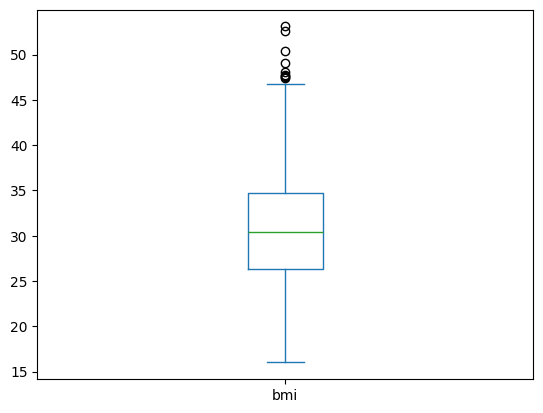

In [ ]:
col = 'bmi'
insurance[col].plot.box()

### Outlier Treatment
- Capping method
- Remove outliers and fillit with missing value

In [ ]:
def compute_whisker_values(num_data):
  q1 = num_data.quantile(0.25)
  q3 = num_data.quantile(0.75)
  iqr = q3 - q1
  lw = q1 - 1.5 * iqr
  uw = q3 + 1.5 * iqr
  return lw, uw

insurance_new = insurance.copy()
for col in ['age', 'bmi']:
  lw, uw = compute_whisker_values(insurance[col])
  #print(col, lw, uw)
  row_indexes_lw_outliers = insurance[insurance[col] < lw].index
  insurance_new.loc[row_indexes_lw_outliers, col] = lw

  row_indexes_uw_outliers = insurance[insurance[col]>uw].index
  insurance_new.loc[row_indexes_uw_outliers, col] = uw


### Standardization method


In [ ]:
num_cols = ['age', 'bmi', 'children']

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(insurance_new[num_cols])
scaled_values = scaler.transform(insurance_new[num_cols])
df_scaled_values = pd.DataFrame(
    scaled_values,
    columns=num_cols
)
#df_scaled_values.describe()

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
cat_cols = ['smoker', 'region', 'sex']
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    drop='first',
    sparse_output=False).fit(insurance_new[cat_cols])
encoded = encoder.transform(insurance_new[cat_cols])
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

X = pd.concat([df_scaled_values, df_encoded], axis=1)
y = insurance_new['expenses']
X.shape, y.shape

((1338, 8), (1338,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [ ]:
# intercept
model.intercept_

9103.331458644556

In [ ]:
# slopes
slopes = pd.Series(model.coef_, index=model.feature_names_in_)
slopes.tolist()[:3]

[3609.1492037140206, 1967.4616553372337, 490.0664615382078]

In [ ]:
#slopes

### Feature importance plot

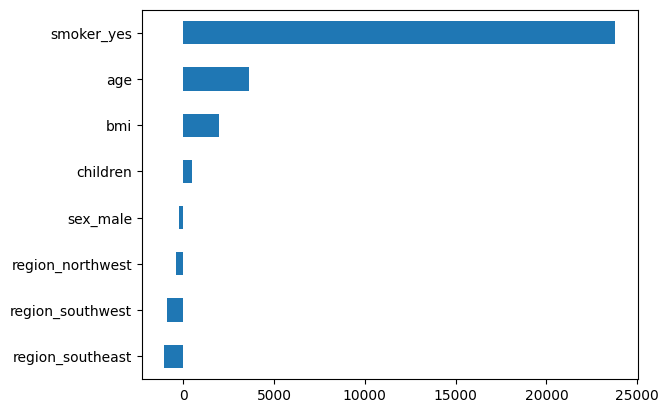

In [ ]:
slopes.sort_values().plot.barh();

<Axes: xlabel='smoker', ylabel='expenses'>

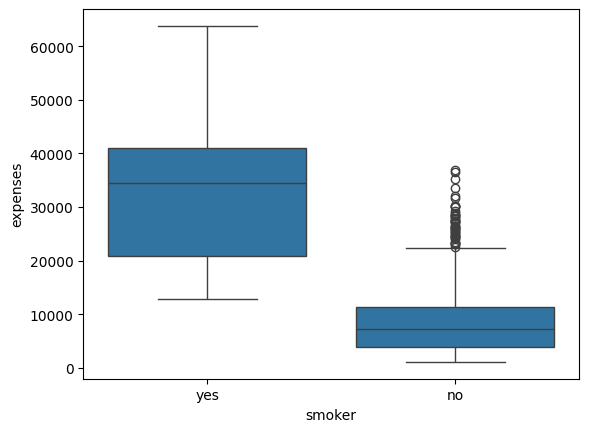

In [ ]:
import seaborn as sns
sns.boxplot(insurance, y='expenses', x='smoker')

### Model Prediction using Test dataset

### How bad is your model?

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

from sklearn.metrics import root_mean_squared_error
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 6064.120267353899
Test RMSE: 5954.0832136964955


### How good is your model

In [ ]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

Train R2: 0.7478654385062149
Test R2: 0.7625204099248017


### Build a linear regression using statsmodel

In [ ]:
import statsmodels.api as sm

X_train_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_constant)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     393.4
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          3.88e-311
Time:                        08:39:41   Log-Likelihood:                -10838.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1061   BIC:                         2.174e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9103.3315    433.935  

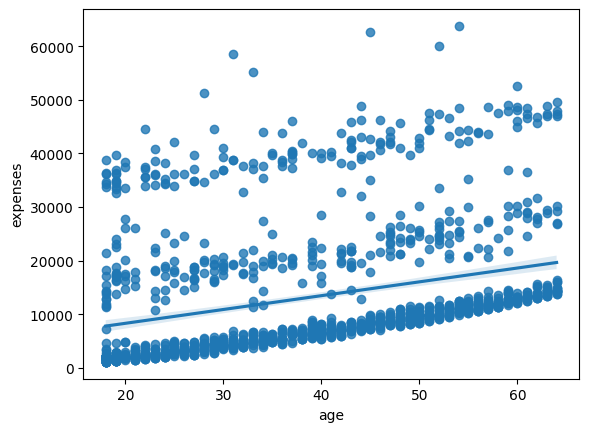

In [ ]:
import seaborn as sns

sns.regplot(insurance, x='age', y='expenses');

In [ ]:
insurance[insurance['age']==60]['expenses'].mean()

21979.419130434784

In [ ]:
cols2drop = ['sex_male', 'region_northwest', 'region_southeast', 'region_southwest']

In [ ]:
X_train_with_constant = sm.add_constant(X_train.drop(columns=cols2drop))
model = sm.OLS(y_train, X_train_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     784.7
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          1.16e-315
Time:                        08:39:48   Log-Likelihood:                -10841.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1065   BIC:                         2.172e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8397.9523    208.992     40.183      0.0

In [ ]:
pd.concat([X_train, y_train],axis=1).corr()['expenses']

,expenses
age,0.303295
bmi,0.186484
children,0.030622
smoker_yes,0.787983
region_northwest,-0.028041
region_southeast,0.051853
region_southwest,-0.026133
sex_male,0.055557
expenses,1.000000


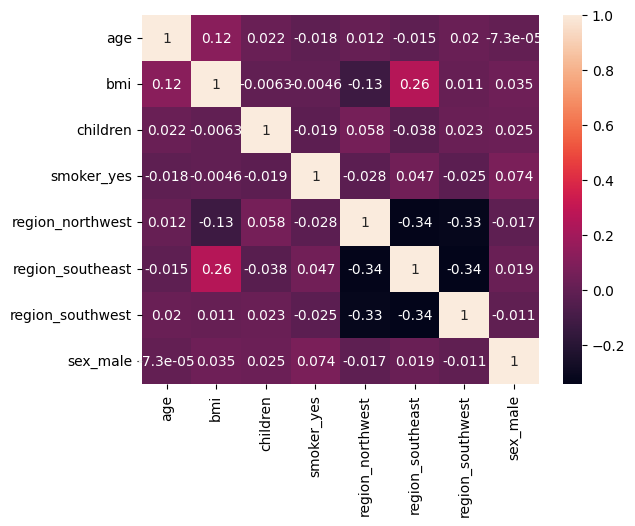

In [ ]:
sns.heatmap(X_train.corr(), annot=True);

## Assumptions in Linear Regression Model

- The dependent variable must be numeric
- Linear relationship between dependent and independent variables
- Predictors must not show multicollinearity
- Independence of observations should exist (Absence of Autocorrelation)
- The error terms should be homoscedastic
- The error terms must follow normal distribution

## Multi-collinearity
- Determinant of the correlation matrix
- VIF method

In [ ]:
np.random.randint(1, 10, 10)

array([3, 9, 7, 5, 2, 5, 9, 3, 4, 5])

In [ ]:
import numpy as np
df = pd.DataFrame({
    'c1': np.random.randint(1, 10, 1000),
    'c2': np.random.randint(2, 30, 1000)
})
noise = np.random.randint(1,5, 1000)
df['c3'] = df['c1'] * 2 + noise
evalues, evectors = np.linalg.eig(df.corr())
evalues

array([1.97782917, 0.02242685, 0.99974398])

In [ ]:
#df.head()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_c3 = variance_inflation_factor(df, 2)
vif_c1 = variance_inflation_factor(df, 0)
vif_c2 = variance_inflation_factor(df, 1)
print(vif_c1, vif_c2, vif_c3)

78.54054280469637 3.560285605709646 91.26186347667036


In [ ]:
vif_all = {}
for i, col in enumerate(X_train.columns):
  vif = variance_inflation_factor(X_train, i)
  vif_all.update({col: vif})

## Residual analysis

## Independence of Observations
- Using autocorrelation analysis

In [ ]:
import yfinance as yf
data = yf.download("AAPL", start="2020-01-01", end="2021-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
ts = pd.DataFrame(data['Close']['AAPL'])
ts['AAPL_lag1'] = ts['AAPL'].shift(1)
ts['AAPL_lag2'] = ts['AAPL'].shift(2)
ts.corr()['AAPL']

,AAPL
AAPL,1.000000
AAPL_lag1,0.992997
AAPL_lag2,0.988425


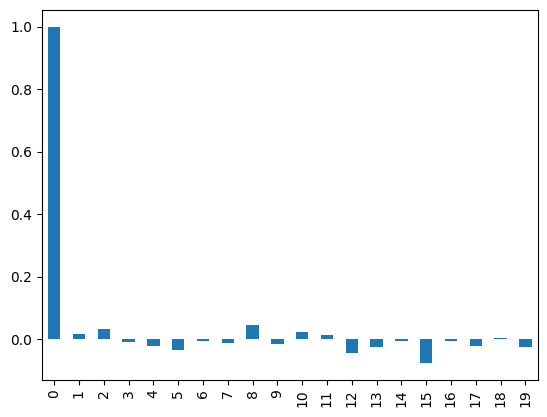

In [ ]:
error = y_train - y_train_pred

acf_values = pd.Series([error.autocorr(i) for i in range(20)])
acf_values.plot.bar();

### Testing error's distribution

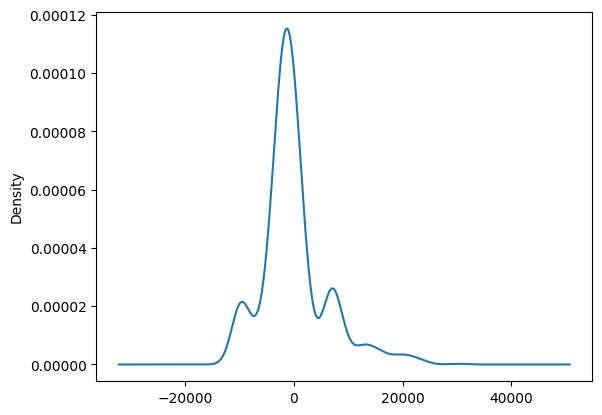

In [ ]:
errors = y_train - y_train_pred
errors.plot.kde();

In [ ]:
np.mean(errors), np.std(errors)

(-1.3463921566432881e-12, 6064.120267353897)

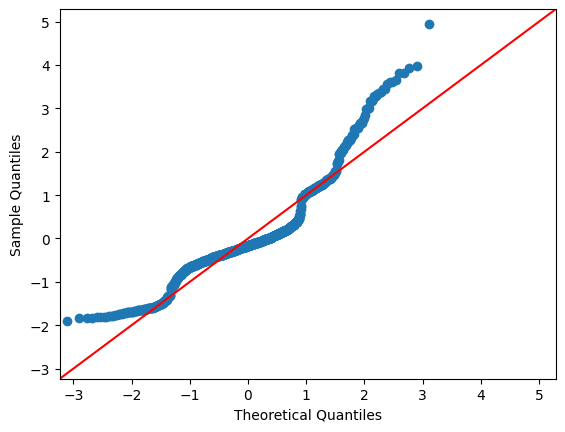

In [ ]:
sm.qqplot(errors, line ='45', fit=True);

In [ ]:
errors.skew()

1.2215540617694882

### Feature engineering / Transformation

1.6930352943434328


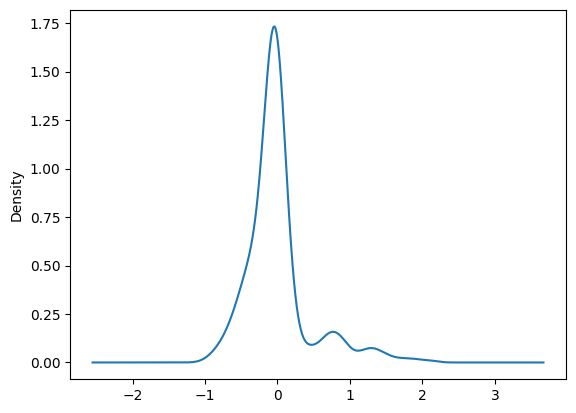

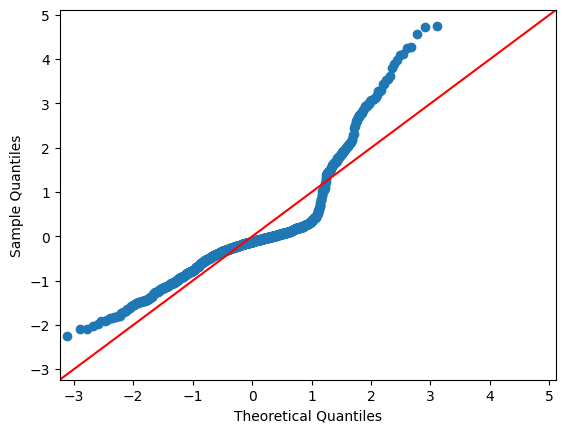

In [ ]:
y_train_log = np.log(y_train)
model = LinearRegression().fit(X_train, y_train_log)

y_train_pred = model.predict(X_train)
errors = y_train_log - y_train_pred
print(errors.skew())
errors.plot.kde();
sm.qqplot(errors, fit=True, line='45');

0.8516437271558385


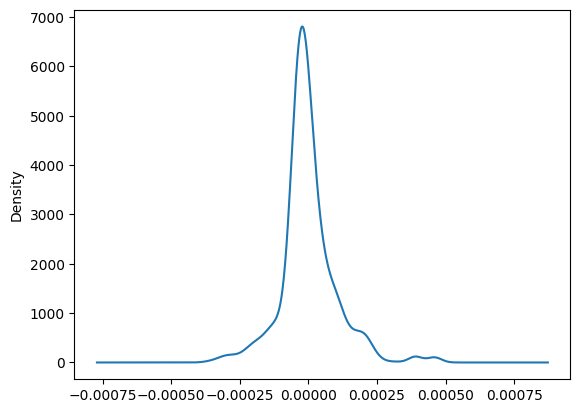

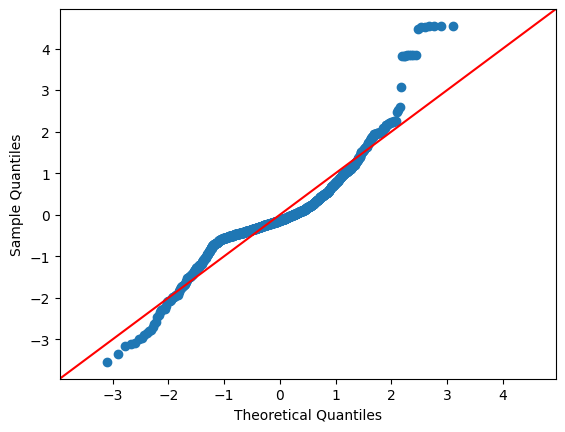

In [ ]:
# Reciprocal transformation (i.e. 1/y)
y_train_transformed = 1/(y_train)
model = LinearRegression().fit(X_train, y_train_transformed)

y_train_pred = model.predict(X_train)
errors = y_train_transformed - y_train_pred
print(errors.skew())
errors.plot.kde();
sm.qqplot(errors, fit=True, line='45');

1.8890563678336703
0.7739033712443126


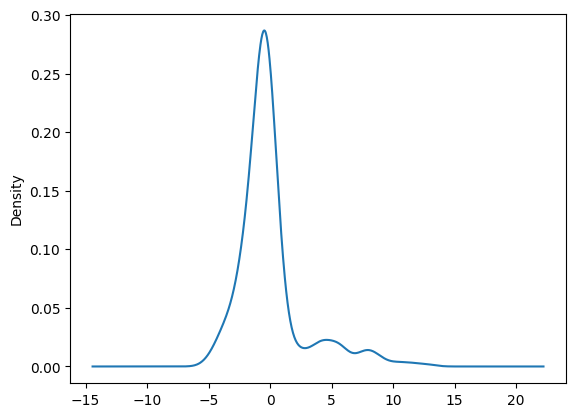

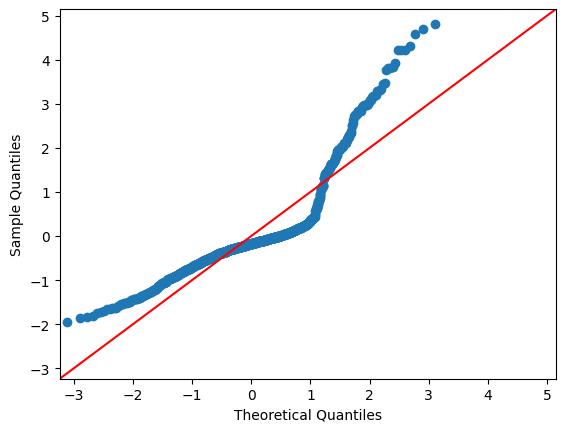

In [ ]:
from scipy.stats import boxcox
y_train_transformed = boxcox(y_train, lmbda=0.2)
y_train_transformed = pd.Series(y_train_transformed, index=y_train.index)
model = LinearRegression().fit(X_train, y_train_transformed)

y_train_pred = model.predict(X_train)
errors = y_train_transformed - y_train_pred
print(errors.skew())
errors.plot.kde();
sm.qqplot(errors, fit=True, line='45');
r2 = r2_score(y_train_transformed, y_train_pred)
print(r2)

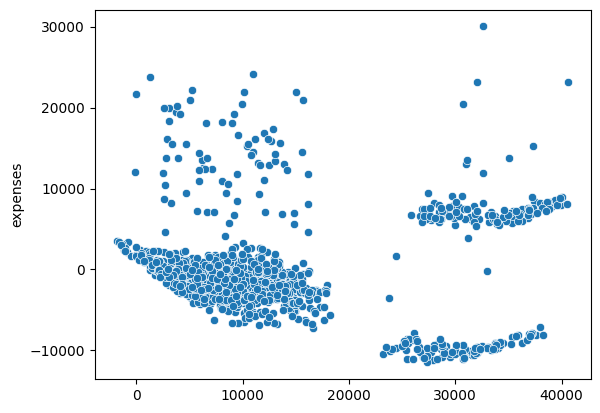

In [ ]:
model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
errors = y_train - y_train_pred
sns.scatterplot(x=y_train_pred, y=errors);

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


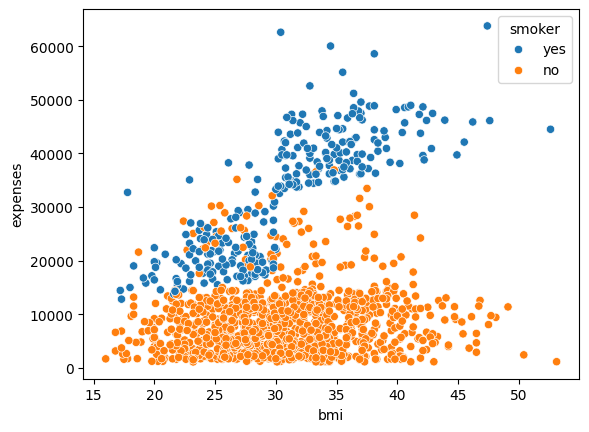

In [ ]:
sns.scatterplot(insurance, x='bmi', y='expenses',  hue='smoker');

<Axes: >

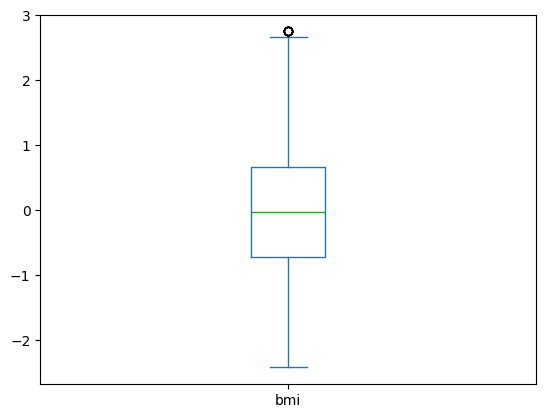

In [ ]:
X_train['bmi'].plot.box()

0.8168457319729554


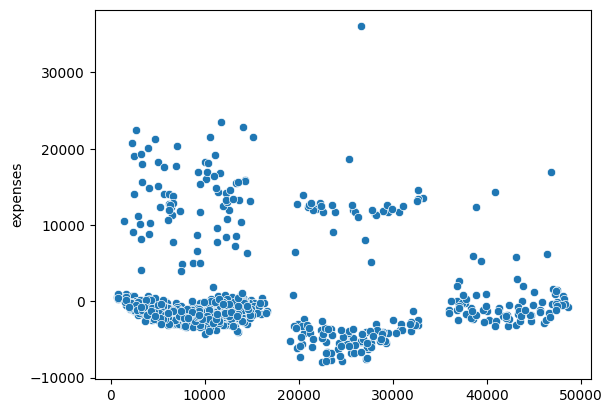

In [ ]:
X_train_new = X_train.copy()
X_train_new['high_bmi_smoker'] = X_train_new.apply(
 lambda row: 1 if (row['smoker_yes'] == 1) and
  (row['bmi']>0.3) else 0, axis=1
)

model = LinearRegression().fit(X_train_new, y_train)
y_train_pred = model.predict(X_train_new)
r2 = r2_score(y_train, y_train_pred)
print(r2)
errors = y_train - y_train_pred
#sm.qqplot(errors, fit=True, line='45');
sns.scatterplot(x=y_train_pred, y=errors);

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
lm_model = LinearRegression()
sfs = SequentialFeatureSelector(
    lm_model,
    direction='forward',
    n_features_to_select='auto'
)
sfs.fit(X_train_new, y_train)

SequentialFeatureSelector(estimator=LinearRegression())

In [ ]:
X_train_new.columns[sfs.support_]

Index(['age', 'bmi', 'smoker_yes', 'high_bmi_smoker'], dtype='object')

In [ ]:
model = LinearRegression().fit(sfs.transform(X_train_new), y_train)
y_train_pred = model.predict(sfs.transform(X_train_new))
r2 = r2_score(y_train, y_train_pred)
r2

0.8130134595172289

In [ ]:
X_train_final = sfs.transform(X_train_new)

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

lm_model = LinearRegression()
cv_scores = cross_val_score(
    lm_model,
    X_train_final,
    y_train,
    cv=3,
    scoring='neg_root_mean_squared_error')
cv_scores


array([-5136.94823836, -5364.15780747, -5259.47419495])

In [ ]:
np.mean(cv_scores)

-5253.526746922152

## Regularization     02/03/2025
